In [ ]:
%pip install tensorflow matplotlib

In [ ]:
%pip install "ray[default, data, tune, serve, client]==2.12.0"

In [2]:
import ray
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from ray.train.tensorflow import prepare_dataset_shard
from ray.air.config import ScalingConfig
from ray.train.tensorflow import TensorflowTrainer

2025-03-21 18:30:21,097	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-21 18:30:22.030520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 18:30:22.138987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 18:30:22.257337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742556622.456494  111364 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742556622.506093  111364 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one

In [3]:
ray.init(address="ray://192.168.122.10:10001") # konek ke ray cluster

Python version:,3.10.14
Ray version:,2.12.0
Dashboard:,http://172.16.68.83:8265


Log channel is reconnecting. Logs produced while the connection was down can be found on the head node of the cluster in `ray_client_server_[port].out`
2025-03-21 20:30:42,328	WARNING dataclient.py:403 -- Encountered connection issues in the data channel. Attempting to reconnect.


In [4]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data() # load cifar-10 dataset
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


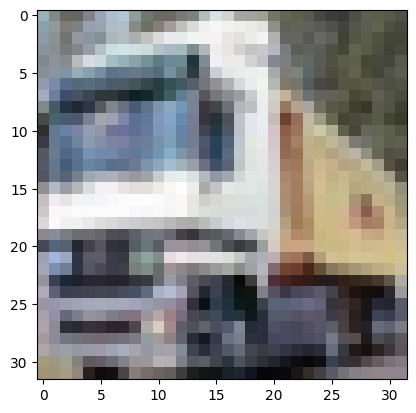

In [5]:
plt.imshow(x_train[1])

In [ ]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)